## Код для создания бинарных строк в генотипах

In [15]:
import csv
import argparse

def do_bin(file1):
    # Функция для загрузки таблицы и извлечения хедера и данных
    def load_table(file):
        with open(file, 'r') as f:
            reader = csv.reader(f, delimiter='\t')
            header = []
            info_header = []
            data = []
            for row in reader:
                if row[0].startswith("#"):
                    if row[0].startswith("#CHROM"):
                        header = row  # Хэдер с образцами отдельно               
                    #else:
                        #info_header.append(row[0])
                else:
                    data.append(row)
            return info_header, header, data
    info_header1, header1, data1 = load_table(file1)
    print('\n'.join(info_header1))
    print('\t'.join(header1))

#binary
    for row in data1:
        snp_info = row[:9]  # Первые 9 столбцов
        genotype1 = [g.replace('./.', '3').replace('0/0', '0').replace('1/1', '1').replace('1/0', '2').replace('0/1', '2') for g in row[10:]]
        print("\t".join(snp_info) + "\t" + "\t".join(genotype1))
# Путь к файлам
file1 = "merged_bowtie2/selected_SNP_subset.vcf"
#if __name__ == "__main__":
    # Настройка аргументов командной строки
#    parser = argparse.ArgumentParser(description="Do binary genotypes.")
#    parser.add_argument('vcf', help="Path to the vcf file")
    
    # Чтение аргументов
#    args = parser.parse_args()
    
    # Запуск функции сравнения с указанными файлами
 #   compare_tables(args.file1)
do_bin(file1)


#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	YGS_8_001.trimmed	YGS_8_003.trimmed	YGS_8_004.trimmed	YGS_8_005.trimmed	YGS_8_006.trimmed	YGS_8_007.trimmed	YGS_8_008.trimmed	YGS_8_011.trimmed	YGS_8_012.trimmed	YGS_8_013.trimmed	YGS_8_014.trimmed	YGS_8_020.trimmed	YGS_8_021.trimmed	YGS_8_022.trimmed	YGS_8_023.trimmed	YGS_8_024.trimmed	YGS_8_027.trimmed	YGS_8_028.trimmed	YGS_8_029.trimmed	YGS_8_030.trimmed	YGS_8_031.trimmed	YGS_8_032.trimmed	YGS_8_035.trimmed	YGS_8_036.trimmed	YGS_8_037.trimmed	YGS_8_038.trimmed	YGS_8_040.trimmed	YGS_8_043.trimmed	YGS_8_046.trimmed	YGS_8_047.trimmed	YGS_8_048.trimmed	YGS_8_051.trimmed	YGS_8_052.trimmed	YGS_8_054.trimmed	YGS_8_055.trimmed	YGS_8_056.trimmed	YGS_8_059.trimmed	YGS_8_060.trimmed	YGS_8_061.trimmed	YGS_8_062.trimmed	YGS_8_063.trimmed	YGS_8_064.trimmed	YGS_8_065.trimmed	YGS_8_067.trimmed	YGS_8_068.trimmed	YGS_8_069.trimmed	YGS_8_072.trimmed	YGS_8_075.trimmed	YGS_8_076.trimmed	YGS_8_077.trimmed	YGS_8_078.trimmed	YGS_8_079.trimmed	YGS_8_080.trimmed

In [35]:
!python ./do_binary_genotypes.py merged_bowtie2/selected_SNP_subset.vcf > SNP_bin_disc_het.tsv

In [17]:
!head -65 SNP_bin_disc.tsv | tail -1

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	YGS_8_001.trimmed	YGS_8_003.trimmed	YGS_8_004.trimmed	YGS_8_005.trimmed	YGS_8_006.trimmed	YGS_8_007.trimmed	YGS_8_008.trimmed	YGS_8_011.trimmed	YGS_8_012.trimmed	YGS_8_013.trimmed	YGS_8_014.trimmed	YGS_8_020.trimmed	YGS_8_021.trimmed	YGS_8_022.trimmed	YGS_8_023.trimmed	YGS_8_024.trimmed	YGS_8_027.trimmed	YGS_8_028.trimmed	YGS_8_029.trimmed	YGS_8_030.trimmed	YGS_8_031.trimmed	YGS_8_032.trimmed	YGS_8_035.trimmed	YGS_8_036.trimmed	YGS_8_037.trimmed	YGS_8_038.trimmed	YGS_8_040.trimmed	YGS_8_043.trimmed	YGS_8_046.trimmed	YGS_8_047.trimmed	YGS_8_048.trimmed	YGS_8_051.trimmed	YGS_8_052.trimmed	YGS_8_054.trimmed	YGS_8_055.trimmed	YGS_8_056.trimmed	YGS_8_059.trimmed	YGS_8_060.trimmed	YGS_8_061.trimmed	YGS_8_062.trimmed	YGS_8_063.trimmed	YGS_8_064.trimmed	YGS_8_065.trimmed	YGS_8_067.trimmed	YGS_8_068.trimmed	YGS_8_069.trimmed	YGS_8_072.trimmed	YGS_8_075.trimmed	YGS_8_076.trimmed	YGS_8_077.trimmed	YGS_8_078.trimmed	YGS_8_079.trimmed	YGS_8_080.trimmed	

## Код для сравнения бинарных строк

In [36]:
!grep -v "##" SNP_bin_disc_het.tsv > SNP_bin_disc_het_filt.tsv

In [37]:
import pandas as pd
import numpy as np

file_path = 'SNP_bin_disc_het_filt.tsv'  # замените на путь к вашему файлу

df = pd.read_csv(file_path, sep='\t')
# Получение названий образцов (с 10-го по последний столбец)
sample_names = df.columns[9:]

# Извлечение данных для каждого образца
matrix = df[sample_names]

# Заменяем NaN на 0 и преобразуем значения в целые числа
matrix = matrix.fillna(0).astype(int)

# Преобразование значений в бинарные строки
binary_matrix = matrix.applymap(lambda x: bin(x)[2:].zfill(2))

# Преобразование каждой колонки в одну длинную бинарную строку
binary_strings = binary_matrix.apply(lambda col: ''.join(col), axis=0)

# Сравнение бинарных строк между собой на полное совпадение
comparison_results = pd.DataFrame(index=sample_names, columns=sample_names)

for sample1 in sample_names:
    for sample2 in sample_names:
        # Проверка на полное совпадение строк
        comparison_results.at[sample1, sample2] = binary_strings[sample1] == binary_strings[sample2]

comparison_results.to_csv('SNP_compare_disc.csv')


/tmp/ipykernel_16196/251637692.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_matrix = matrix.applymap(lambda x: bin(x)[2:].zfill(2))


/tmp/ipykernel_16196/3316355442.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_matrix = matrix.applymap(lambda x: bin(x)[2:].zfill(2))
/tmp/ipykernel_16196/3316355442.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_matrix_numerical = binary_matrix.applymap(lambda x: int(x, 2))


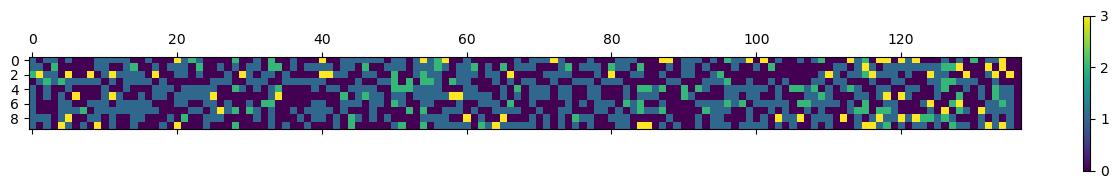

[[1 0 1 ... 3 0 0]
 [1 1 0 ... 3 0 0]
 [2 3 1 ... 0 3 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 1 1 ... 0 1 0]
 [1 0 1 ... 3 1 0]]


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

binary_matrix = matrix.applymap(lambda x: bin(x)[2:].zfill(2))

# Преобразование бинарных строк в числовую матрицу
binary_matrix_numerical = binary_matrix.applymap(lambda x: int(x, 2))

# Преобразование в numpy массив
matrix_array = binary_matrix_numerical.to_numpy()

# Визуализация матрицы с помощью matplotlib
plt.matshow(matrix_array)
plt.colorbar()
plt.show()

# Теперь matrix готова для использования с matplotlib
print(matrix_array)

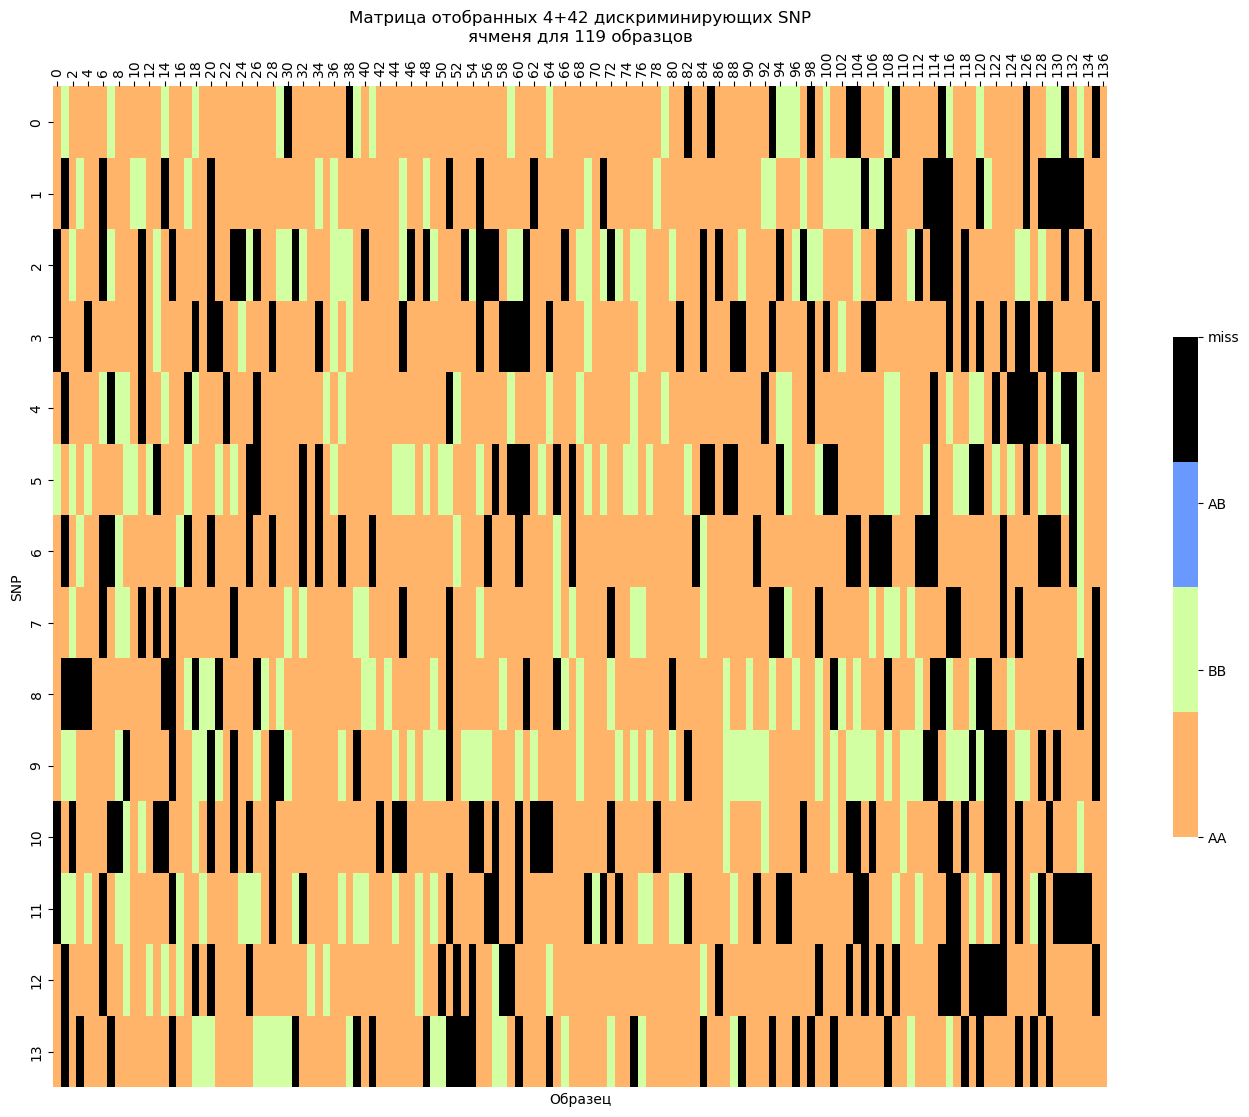

In [34]:
import seaborn as sns
plt.figure(figsize=(17, 13))
g = sns.heatmap(matrix_array, cmap=['#ffb469', '#d3ffa3', '#6998ff', 'black'], cbar=True, cbar_kws={'shrink': 0.5})
g.set(xlabel='Образец', ylabel='SNP', title='Матрица отобранных 4+42 дискриминирующих SNP\nячменя для 119 образцов')
g.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, rotation=90)
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['AA', 'BB', 'AB', 'miss'])

In [ ]:
import pandas as pd

# Загрузка файла с данными
file_path = 'SNP_bin.tsv'  # замените на путь к вашему файлу
df = pd.read_csv(file_path, sep='\t')

# Получение названий образцов (с 10-го по последний столбец)
sample_names = df.columns[9:]

# Извлечение данных для каждого образца и создание матрицы
matrix = df[sample_names]

# Сохранение матрицы в файл
output_file = 'SNP_bin_matrix.tsv'
print(matrix)
#matrix.to_csv(output_file, index=False)

#print(f"Матрица сохранена в файл: {output_file}")
